In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pprint

from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [6]:
file = open("CALI.csv")
data=pd.read_csv(file,)
df_x = pd.DataFrame(data, columns = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude'])
df_y = pd.DataFrame(data,columns=['HOUSING PRICE'])

In [7]:
# An alternative function to call - better stats description
from statsmodels.api import OLS
model_LR = OLS(df_y, df_x).fit()
model_LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          HOUSING PRICE   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          2.137e+04
Date:                Wed, 09 Jun 2021   Prob (F-statistic):                        0.00
Time:                        10:08:19   Log-Likelihood:                         -24087.
No. Observations:               20640   AIC:                                  4.819e+04
Df Residuals:                   20632   BIC:                                  4.825e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5135      0.004    120.594      0.000       0.505       0.522
HouseAge       0.0157      0.000     33.727      0.000       0.015       0.017
AveRooms      -0.1825      0.006    -29.673      0.000      -0.195      -0.170
AveBedrms      0.8651      0.030     28.927      0.000       0.806       0.924
Population  7.792e-06   5.09e-06      1.530      0.126   -2.19e-06    1.78e-05
AveOccup      -0.0047      0.001     -8.987      0.000      -0.006      -0.004
Latitude      -0.0639      0.004    -17.826      0.000      -0.071      -0.057
Longitude     -0.0164      0.001    -14.381      0.000      -0.019      -0.014
==============================================================================
Omnibus:                     4353.392   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.489
Skew:                           1.069   Prob(JB):                         0.00
Kurtosis:                       6.436   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 4)

In [9]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
results = model.predict(x_test)

In [10]:
print(np.c_[y_test.values, results][0:5,:])

[[1.752      2.06302041]
 [3.147      2.50552547]
 [0.9        1.61461714]
 [1.231      1.39379827]
 [3.509      2.59927355]]


In [11]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_train,y_train)
print('R2 sq: ', model_score)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, results))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, results))

R2 sq:  0.6083953032289722
Mean squared error: 0.53
Test Variance score: 0.60


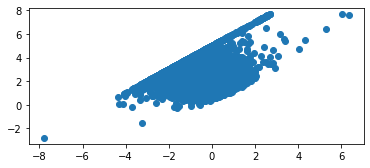

In [12]:
pred_val = model_LR.fittedvalues.copy()
residual = pred_val - df_y.values.flatten()

fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(residual, pred_val)

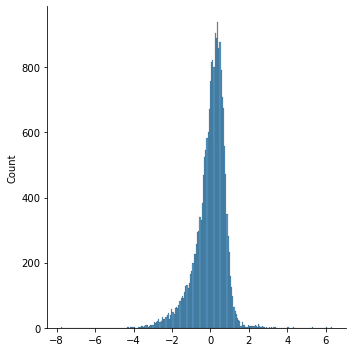

In [16]:
sns.displot(residual);

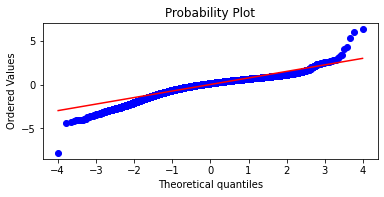

In [14]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

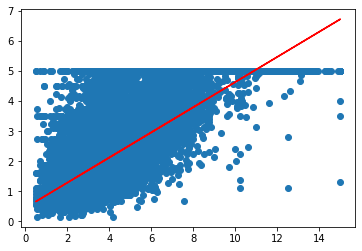

In [15]:
# Examining simple linear regression...

#X = df_x['CRIM'].values.reshape(-1, 1)
X = df_x.iloc[:,0].values.reshape(-1, 1)
#X = df_x['RM'].values.reshape(-1, 1)
#X = df_x.iloc[:,5].values.reshape(-1, 1)
Y = df_y.values.reshape(-1,1)

model3 = linear_model.LinearRegression()
model3.fit(X,Y)
Y_pred = model3.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()